In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


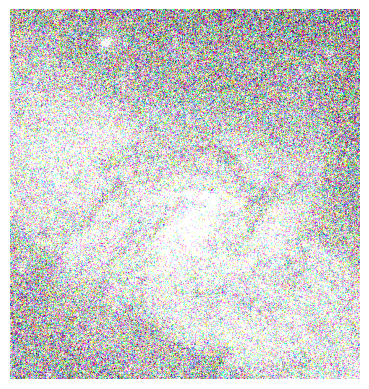

Processed 5 noisy images.


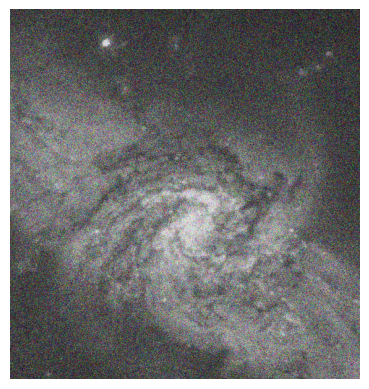

Processed 10 noisy images.


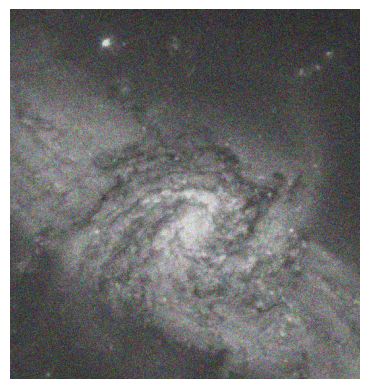

Processed 20 noisy images.


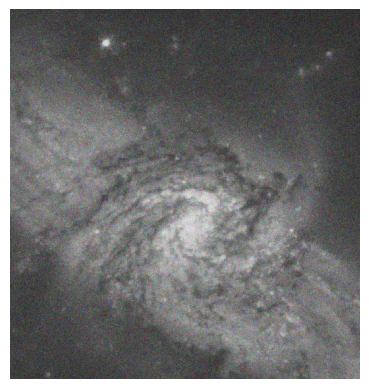

Processed 50 noisy images.


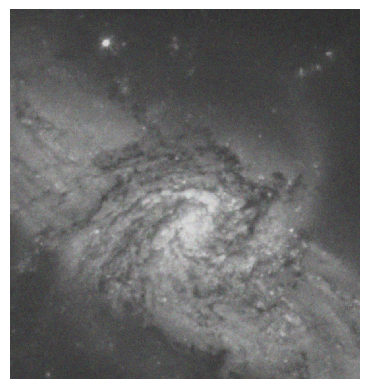

Processed 100 noisy images.


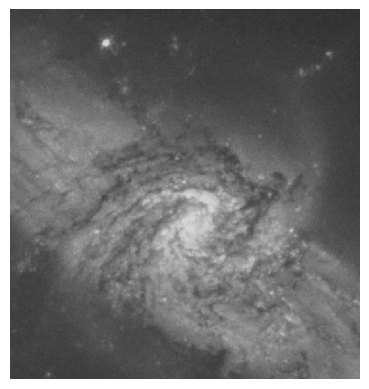

In [ ]:
def add_gaussian_noise(image, mean, std_dev):
    # Generate random noise with the same shape as the image
    noise = np.random.normal(mean, std_dev, image.shape)

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image

im = cv2.imread("foto.tif")

# Add Gaussian noise to the image
im_noisy = add_gaussian_noise(im, mean=0, std_dev=100)

plt.axis('off')
plt.imshow(im_noisy)
plt.show()

# Now we the mean of noisy images to get a clean image, for 5,10,10,50 and 100 images

# Convert to uint8 for display purposes
im_noisy = im_noisy.astype(np.uint8)
numbers = [5, 10, 20, 50, 100]
new_images = []

def add_noisy_images(image, samples):
    temp_images = []
    for i in range(samples):
        noisy_image = add_gaussian_noise(image, mean=0, std_dev=100)
        temp_images.append(noisy_image)
    # Compute the mean image by summing and dividing by samples
    mean_image = np.mean(temp_images, axis=0)
    return mean_image

for n in numbers:
    new_images.append(add_noisy_images(im, n))
    print(f"Processed {n} noisy images.")
    plt.axis('off')
    plt.imshow(new_images[-1].astype(np.uint8))
    plt.show()
